In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('C:/Users/vanes/Desktop/BSE/Term 1/Computing for Data Science/final_project/spotify_data.csv')

print(df.shape)
df.head()

(1159764, 20)


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

Ideas to seperate the dataframe

In [4]:
# by year
grouped_df = df.groupby('year').agg(value_count=('year', 'size'), mean_popularity=('popularity', 'mean')).reset_index()

# Order by 'year'
result_df = grouped_df.sort_values('year')

# Print the result
print(result_df)

    year  value_count  mean_popularity
0   2000        44034        10.736181
1   2001        42351        11.253359
2   2002        42102        11.679041
3   2003        42368        12.435730
4   2004        43390        12.298732
5   2005        43780        13.424920
6   2006        45474        13.137903
7   2007        46001        13.471446
8   2008        47432        13.462894
9   2009        46869        14.404596
10  2010        46868        14.856000
11  2011        46444        15.884894
12  2012        54797        16.359855
13  2013        53216        17.511839
14  2014        53179        18.807687
15  2015        51607        20.115139
16  2016        40273        22.319519
17  2017        56241        23.095269
18  2018        56572        24.161246
19  2019        55793        25.633628
20  2020        55066        26.464679
21  2021        53566        28.151831
22  2022        53692        31.088970
23  2023        38649        19.921524


there seems to be a linear correlation between the songs and the mean_popularity. We can still say that we use only data from 2022, to make a valid prediction for upcoming data (kind of a success recipe for future songs)

In [5]:
# by genre
grouped_df = df.groupby('genre').agg(value_count=('genre', 'size'), mean_popularity=('popularity', 'mean')).reset_index()

# Order by 'year'
result_df = grouped_df.sort_values('value_count')

# Print the result
print(result_df)

             genre  value_count  mean_popularity
74      songwriter          589        13.623090
63            rock         3319        46.228985
18  detroit-techno         3920         2.953827
22         dubstep         4774         3.509426
8    chicago-house         5170         3.260542
..             ...          ...              ...
2         alt-rock        20918        38.596807
0         acoustic        21097        17.825094
3          ambient        21389        20.008743
33          gospel        21621        18.920401
4      black-metal        21852        11.089969

[82 rows x 3 columns]


I would rather just go and analyze the 2022 data

In [28]:
df = df[df['year'] == 2022]

In [29]:
df.shape

(53692, 20)

In [30]:
export_data_path = 'C:/Users/vanes/Desktop/BSE/Term 1/Computing for Data Science/final_project/reduced_spotify_data.csv'
df.to_csv(export_data_path, index=False)

In [8]:
df['genre'].value_counts()

genre
comedy            966
hardstyle         964
sleep             962
chill             935
ambient           916
                 ... 
rock              193
detroit-techno    191
house              97
dubstep            21
songwriter          2
Name: count, Length: 82, dtype: int64

In [9]:
df['artist_name'].value_counts()

artist_name
Sleep Fruits Music    312
SICK LEGEND           312
Rain Fruits Sounds    245
Francisco Canaro      152
Elvis Presley         142
                     ... 
The Nelons              1
Dr. Ipyana              1
Klebson Kollins         1
Christian Mukuna        1
Télépopmusik            1
Name: count, Length: 12779, dtype: int64

In [10]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,53692.000000,53692.000000,53692.0,53692.000000,53692.000000,53692.00000,53692.000000,53692.000000,53692.000000,53692.00000,53692.000000,53692.000000,53692.000000,53692.000000,5.369200e+04,53692.000000
mean,557155.500000,31.088970,2022.0,0.548411,0.641324,5.26937,-8.962979,0.617839,0.098261,0.31657,0.250889,0.217718,0.425979,122.101232,2.165807e+05,3.893727
std,15499.689664,17.848236,0.0,0.181508,0.274144,3.56453,6.237880,0.485920,0.135566,0.35344,0.366219,0.192361,0.258060,30.035130,1.050098e+05,0.454595
min,530310.000000,0.000000,2022.0,0.054200,0.000056,0.00000,-47.322000,0.000000,0.022200,0.00000,0.000000,0.009950,0.000000,31.237000,1.555900e+04,0.000000
25%,543732.750000,17.000000,2022.0,0.430750,0.462000,2.00000,-10.458000,0.000000,0.038400,0.00734,0.000000,0.100000,0.207000,99.605750,1.616668e+05,4.000000
50%,557155.500000,31.000000,2022.0,0.564000,0.702000,5.00000,-7.185000,1.000000,0.052100,0.14300,0.001330,0.131000,0.401000,123.002000,2.000000e+05,4.000000
75%,570578.250000,44.000000,2022.0,0.685000,0.873000,8.00000,-5.131000,1.000000,0.092800,0.61800,0.609000,0.284000,0.626000,140.038000,2.493645e+05,4.000000
max,584001.000000,94.000000,2022.0,0.985000,1.000000,11.00000,2.820000,1.000000,0.962000,0.99600,1.000000,0.998000,0.995000,229.949000,4.318932e+06,5.000000


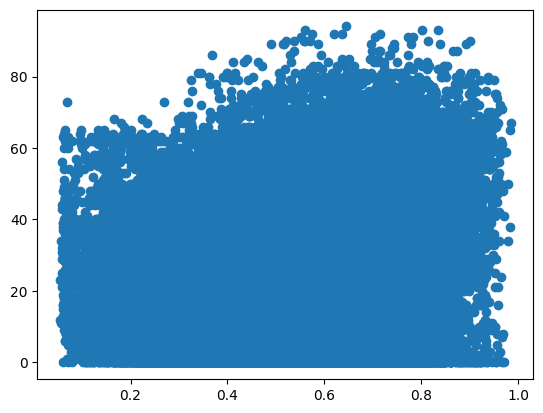

In [11]:
plt.scatter(df['danceability'], df['popularity'])

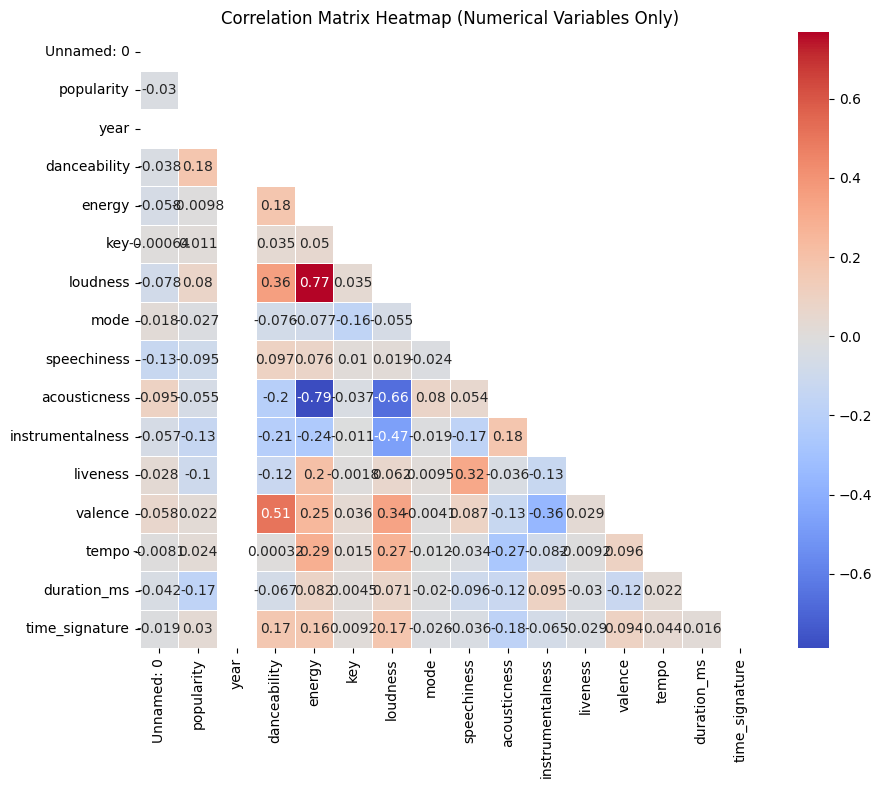

In [12]:
# List of numerical columns to exclude from the correlation matrix
#exclude_columns = ['popularity', danceability	energy	key	loudness	mode	speechiness	acousticness	instrumentalness	liveness	valence	tempo	duration_ms	time_signature'train_dummy', 'num_supermarkets', 'index']

# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

# Creating a new dataframe with only the selected numerical columns
selected_df = df[numerical_columns]

# Correlation matrix 
correlation_matrix = selected_df.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()

highest positive impact on popularity: danceability, lodness
highest negative impact on popularity: duration, instrumentalness, liveness
collinearity between variables: loudness and energy, maybe together with dancability?; accousitcness and energy / loudness as negative relationship


### ideas to work with data / feature engineering

target encode artists with popularity maybe?

In [13]:
# Group by 'artist_name' and calculate the mean popularity
mean_popularity_by_artist = df.groupby('artist_name')['popularity'].mean()

# Sort by mean popularity in descending order
sorted_mean_popularity = mean_popularity_by_artist.sort_values(ascending=False)

sorted_mean_popularity

artist_name
Yandel               91.0
Ozuna                90.0
Ñengo Flow           89.0
Rema                 87.5
Shakira              86.0
                     ... 
Fanga                 0.0
Vivian Lai            0.0
Felix Martin          0.0
Vladimir Nechaev      0.0
Kristin Chenoweth     0.0
Name: popularity, Length: 12779, dtype: float64

In [14]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

Maybe too many artists

transform duration

In [15]:
df['duration_minutes'] = df['duration_ms'] / 60000

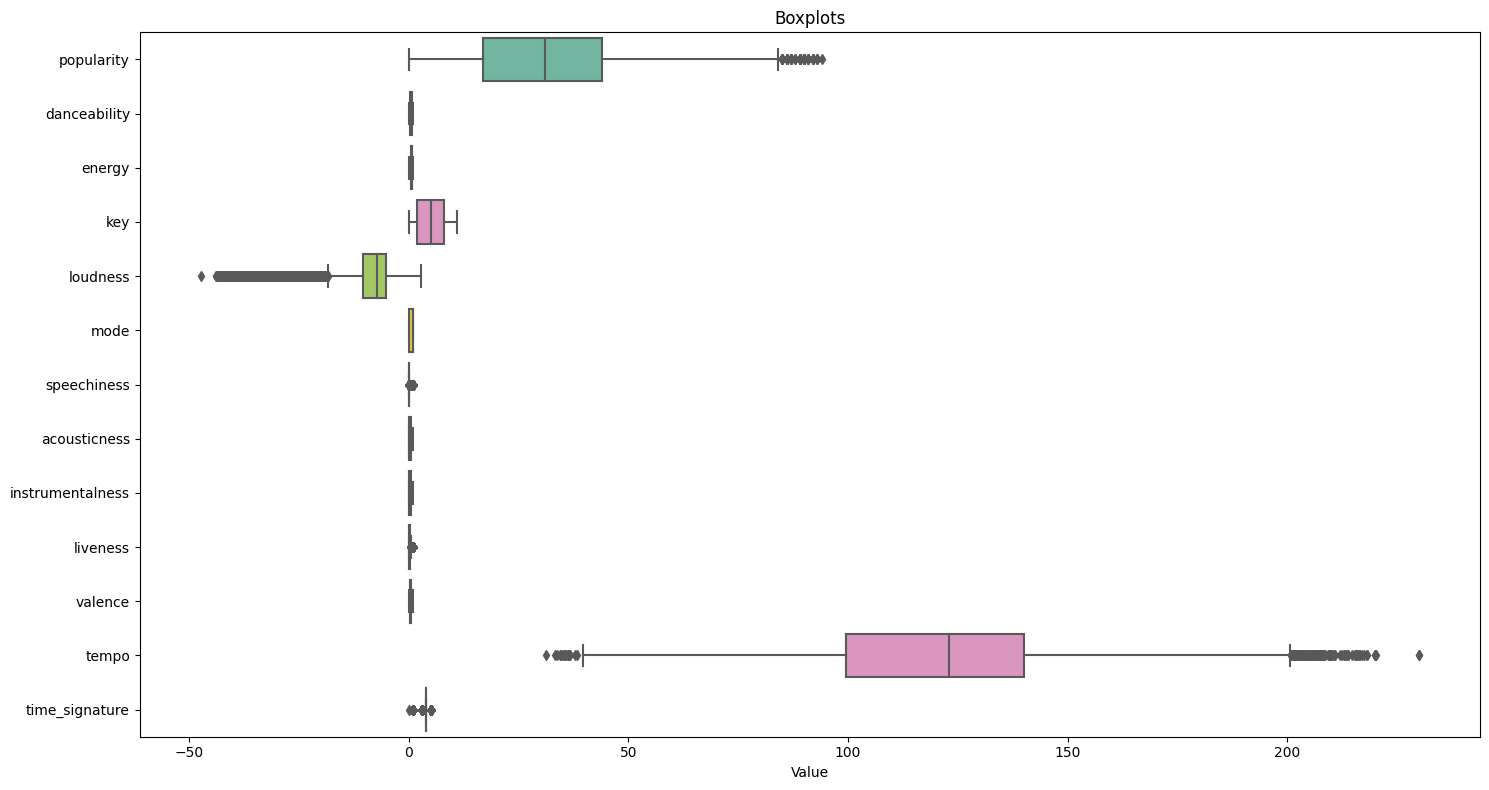

In [16]:
# Look at outlier distribution for non-binary variables
plt.figure(figsize=(15, 8))

sns.boxplot(data=df[['track_name','popularity','danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']], orient="h", palette="Set2")
plt.title("Boxplots")
plt.xlabel("Value")

plt.tight_layout()

# Show the plot
plt.show()

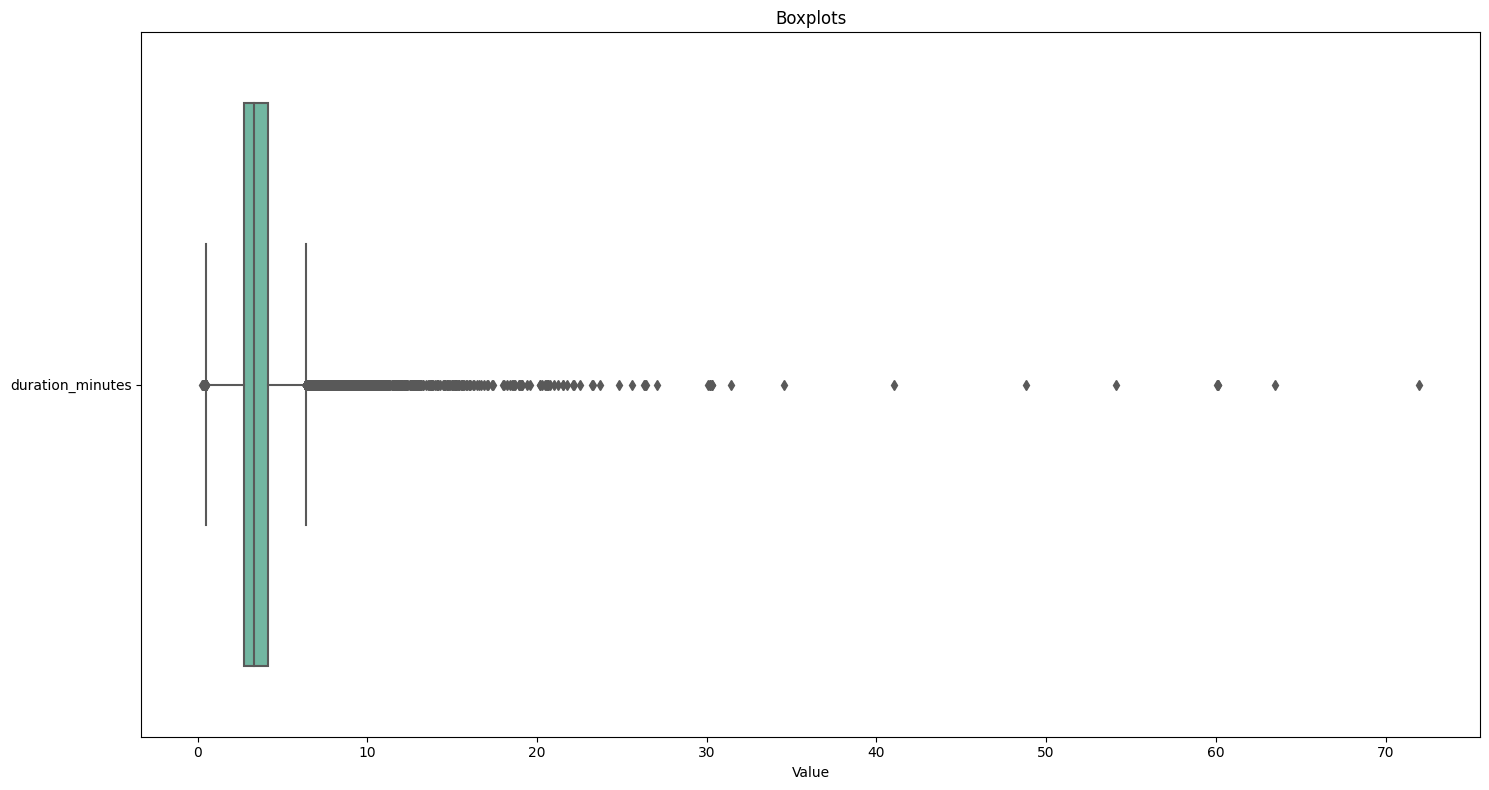

In [17]:

plt.figure(figsize=(15, 8))

sns.boxplot(data=df[['duration_minutes']], orient="h", palette="Set2")
plt.title("Boxplots")
plt.xlabel("Value")

plt.tight_layout()

# Show the plot
plt.show()

### preprocessing steps

- delete some columns (track-id, unnamed)
- transform duration to minute type
- put all in one preprocessing class?

In [18]:
def drop_columns(df, columns_to_drop):
    if isinstance(columns_to_drop, str):  # If a single column name is provided
        columns_to_drop = [columns_to_drop]  # Convert it to a list

    missing_columns = [col for col in columns_to_drop if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Columns {missing_columns} not found in the DataFrame.")

    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    return df


In [19]:
drop_columns(df, ['track_id'])

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
530310,530310,Gen Hoshino,Comedy,68,2022,acoustic,0.676,0.461,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,230667,4,3.844450
530311,530311,Steve Moakler,Make A Little Room,55,2022,acoustic,0.758,0.722,1,-6.252,1,0.0511,0.16500,0.000006,0.1060,0.660,146.031,180493,4,3.008217
530312,530312,Ben Rector,Steady Love,57,2022,acoustic,0.678,0.277,11,-10.537,1,0.0602,0.84300,0.000004,0.1040,0.238,76.935,224333,4,3.738883
530313,530313,Ben Rector,Living My Best Life,56,2022,acoustic,0.566,0.733,4,-5.302,1,0.0699,0.08300,0.000002,0.3620,0.636,178.828,215213,4,3.586883
530314,530314,Drew Holcomb,Coming Home,54,2022,acoustic,0.625,0.810,10,-5.995,1,0.0330,0.14600,0.000027,0.1350,0.741,104.066,146360,4,2.439333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583997,583997,Ursula 1000,Don't Cheat The Beat,1,2022,trip-hop,0.696,0.806,4,-6.447,0,0.0347,0.01190,0.013100,0.0708,0.963,120.015,251803,4,4.196717
583998,583998,Morcheeba,What New York Couples Fight About - Instrumental,0,2022,trip-hop,0.667,0.634,2,-10.974,1,0.0275,0.37600,0.648000,0.1020,0.412,155.991,375667,4,6.261117
583999,583999,Morcheeba,Way Beyond - Instrumental,0,2022,trip-hop,0.630,0.472,7,-9.448,1,0.0310,0.00779,0.802000,0.1300,0.379,81.001,216507,4,3.608450
584000,584000,Jay-Jay Johanson,"Both sides now - From ""Love Actually""",9,2022,trip-hop,0.331,0.280,11,-10.733,1,0.0360,0.69800,0.004090,0.1910,0.263,73.156,270187,5,4.503117


In [20]:
def transform_ms_to_minutes(df, column):
    # Check if the specified column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")

    # Extract the first part of the column name before the underscore
    column_prefix = column.split('_')[0]

    # Create a new column with the duration in minutes
    df[f'{column_prefix}_minutes'] = df[column] / 60000
    df.drop(column, axis=1, inplace=True)

    return df

In [21]:
transform_ms_to_minutes(df, 'duration_ms')

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
530310,530310,Gen Hoshino,Comedy,68,2022,acoustic,0.676,0.461,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,3.844450
530311,530311,Steve Moakler,Make A Little Room,55,2022,acoustic,0.758,0.722,1,-6.252,1,0.0511,0.16500,0.000006,0.1060,0.660,146.031,4,3.008217
530312,530312,Ben Rector,Steady Love,57,2022,acoustic,0.678,0.277,11,-10.537,1,0.0602,0.84300,0.000004,0.1040,0.238,76.935,4,3.738883
530313,530313,Ben Rector,Living My Best Life,56,2022,acoustic,0.566,0.733,4,-5.302,1,0.0699,0.08300,0.000002,0.3620,0.636,178.828,4,3.586883
530314,530314,Drew Holcomb,Coming Home,54,2022,acoustic,0.625,0.810,10,-5.995,1,0.0330,0.14600,0.000027,0.1350,0.741,104.066,4,2.439333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583997,583997,Ursula 1000,Don't Cheat The Beat,1,2022,trip-hop,0.696,0.806,4,-6.447,0,0.0347,0.01190,0.013100,0.0708,0.963,120.015,4,4.196717
583998,583998,Morcheeba,What New York Couples Fight About - Instrumental,0,2022,trip-hop,0.667,0.634,2,-10.974,1,0.0275,0.37600,0.648000,0.1020,0.412,155.991,4,6.261117
583999,583999,Morcheeba,Way Beyond - Instrumental,0,2022,trip-hop,0.630,0.472,7,-9.448,1,0.0310,0.00779,0.802000,0.1300,0.379,81.001,4,3.608450
584000,584000,Jay-Jay Johanson,"Both sides now - From ""Love Actually""",9,2022,trip-hop,0.331,0.280,11,-10.733,1,0.0360,0.69800,0.004090,0.1910,0.263,73.156,5,4.503117


In [22]:
from abc import ABCMeta, abstractmethod
import pandas as pd

class data_preprocessing(metaclass=ABCMeta):
    def __init__(self, name):
        self.name = name
        
        @abstractmethod
        def drop_columns(self):
            return NotImplementedError
        
        @abstractmethod
        def transform_columns(self):
            return NotImplementedError
        
    
class drop(data_preprocessing):
    def __init__(self, data, columns_to_drop):
        self.data = data
        self.columns_to_drop = columns_to_drop
        
    def drop_columns(self):
        if isinstance(self.columns_to_drop, str):  # If a single column name is provided
            self.columns_to_drop = [self.columns_to_drop]  # Convert it to a list

        missing_columns = [col for col in self.columns_to_drop if col not in self.data.columns]
        if missing_columns:
            raise ValueError(f"Columns {missing_columns} not found in the DataFrame.")

        self.data.drop(columns=self.columns_to_drop, axis=1, inplace=True)
        return self.data
    
class transform_columns(data_preprocessing):
    def __init__(self, data, columns):
        self.data = data
        self.columns = columns

    def transform_ms_to_minutes(self):
        if self.columns not in self.data.columns:
            raise ValueError(f"Column '{self.columns}' not found in the DataFrame.")

        # Extract the first part of the column name before the underscore
        column_prefix = self.columns.split('_')[0]

        # Create a new column with the duration in minutes
        self.data[f'{column_prefix}_minutes'] = self.data[self.columns] / 60000
        self.data.drop(self.columns, axis=1, inplace=True)

        return self.data



In [ ]:
df = drop(data = df, columns_to_drop='track_id').drop_columns()

In [ ]:
df = transform_columns(df, 'duration_ms').transform_ms_to_minutes()

### feature generation (at least 5)

- create new features: tracks that contain love; I, you, we; dance
- new categories (dance songs, ballades etc)

In [23]:
def create_binary_columns(df, title_column):
    # Check if the specified column exists in the DataFrame
    if title_column not in df.columns:
        raise ValueError(f"Column '{title_column}' not found in the DataFrame.")

    # Create binary columns based on specific words
    df['contains_love'] = df[title_column].str.contains('love', case=False).astype(int)
    df['contains_dance'] = df[title_column].str.contains('dance|dancing', case=False, regex=True).astype(int)
    df['contains_I_you_we'] = df[title_column].str.contains(r'\bI\b|\byou\b|\bwe\b', case=False, regex=True).astype(int)


    return df

In [24]:
create_binary_columns(df, 'track_name')

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes,contains_love,contains_dance,contains_I_you_we
530310,530310,Gen Hoshino,Comedy,68,2022,acoustic,0.676,0.461,1,-6.746,...,0.03220,0.000001,0.3580,0.715,87.917,4,3.844450,0,0,0
530311,530311,Steve Moakler,Make A Little Room,55,2022,acoustic,0.758,0.722,1,-6.252,...,0.16500,0.000006,0.1060,0.660,146.031,4,3.008217,0,0,0
530312,530312,Ben Rector,Steady Love,57,2022,acoustic,0.678,0.277,11,-10.537,...,0.84300,0.000004,0.1040,0.238,76.935,4,3.738883,1,0,0
530313,530313,Ben Rector,Living My Best Life,56,2022,acoustic,0.566,0.733,4,-5.302,...,0.08300,0.000002,0.3620,0.636,178.828,4,3.586883,0,0,0
530314,530314,Drew Holcomb,Coming Home,54,2022,acoustic,0.625,0.810,10,-5.995,...,0.14600,0.000027,0.1350,0.741,104.066,4,2.439333,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583997,583997,Ursula 1000,Don't Cheat The Beat,1,2022,trip-hop,0.696,0.806,4,-6.447,...,0.01190,0.013100,0.0708,0.963,120.015,4,4.196717,0,0,0
583998,583998,Morcheeba,What New York Couples Fight About - Instrumental,0,2022,trip-hop,0.667,0.634,2,-10.974,...,0.37600,0.648000,0.1020,0.412,155.991,4,6.261117,0,0,0
583999,583999,Morcheeba,Way Beyond - Instrumental,0,2022,trip-hop,0.630,0.472,7,-9.448,...,0.00779,0.802000,0.1300,0.379,81.001,4,3.608450,0,0,0
584000,584000,Jay-Jay Johanson,"Both sides now - From ""Love Actually""",9,2022,trip-hop,0.331,0.280,11,-10.733,...,0.69800,0.004090,0.1910,0.263,73.156,5,4.503117,1,0,0


defining party variable

In [25]:
df[(df['danceability']>0.5) & (df['loudness']>-5.131) & (df['energy']>0.5)]

,Unnamed: 0,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes,contains_love,contains_dance,contains_I_you_we
530345,530345,Zack Tabudlo,Iba (ft. Moira Dela Torre),57,2022,acoustic,0.563,0.799,2,-4.599,...,0.5290,0.000241,0.2800,0.469,140.045,4,4.264283,0,0,0
530365,530365,NEEDTOBREATHE,Talk of the Town (Acoustic),39,2022,acoustic,0.513,0.617,1,-5.025,...,0.4800,0.000010,0.0777,0.670,171.901,4,3.434100,0,0,0
530384,530384,Gen Hoshino,I Wanna Be Your Ghost (feat. Ghosts),44,2022,acoustic,0.829,0.751,11,-4.937,...,0.0142,0.014000,0.0414,0.960,129.993,4,3.758883,0,0,1
530513,530513,NEEDTOBREATHE,The Outsiders - Live From Bridgestone Arena,30,2022,acoustic,0.570,0.931,2,-4.119,...,0.0309,0.002760,0.9480,0.516,105.920,4,4.971500,0,0,0
530526,530526,Pigeon Pit,Soup For My Family,28,2022,acoustic,0.594,0.691,2,-4.188,...,0.5660,0.000000,0.1040,0.843,97.013,4,2.302217,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583755,583755,DJ Krush,Circle,11,2022,trip-hop,0.681,0.901,1,-4.950,...,0.0532,0.000001,0.3140,0.814,150.093,4,3.368133,0,0,0
583836,583836,DJ Vadim,Lift Off,9,2022,trip-hop,0.813,0.869,10,-5.004,...,0.4220,0.000000,0.0787,0.963,102.988,4,3.055333,0,0,0
583839,583839,Groove Armada,2000 People - GA25 Version,14,2022,trip-hop,0.620,0.785,3,-4.194,...,0.0173,0.000804,0.3250,0.288,119.994,4,3.762000,0,0,0
583931,583931,Olive,All You Ever Needed,0,2022,trip-hop,0.655,0.788,10,-4.315,...,0.0782,0.000683,0.1360,0.687,139.018,4,4.420000,0,0,1


In [26]:
df.isna().sum()

Unnamed: 0           0
artist_name          0
track_name           0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
duration_minutes     0
contains_love        0
contains_dance       0
contains_I_you_we    0
dtype: int64